In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns

# Checking if there are any categorical columns with missing values
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_1, drop_first=True)

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])


# Defining Features and Target Variable
x_data_1 = data_1.drop(['id','stroke'], axis = 1)
y_data_1 = data_1['stroke']

print(data_1.info())

#splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB
None


kNN Accuracy: 0.9334637964774951
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022



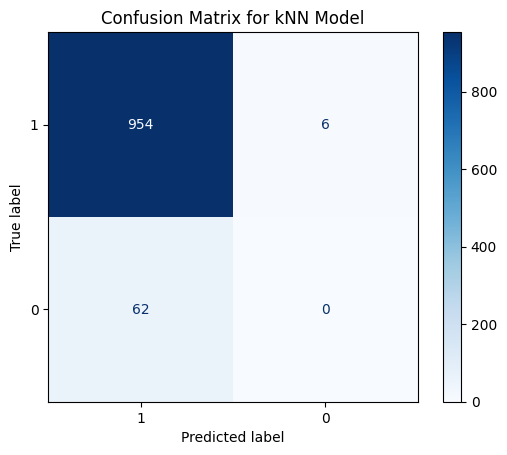

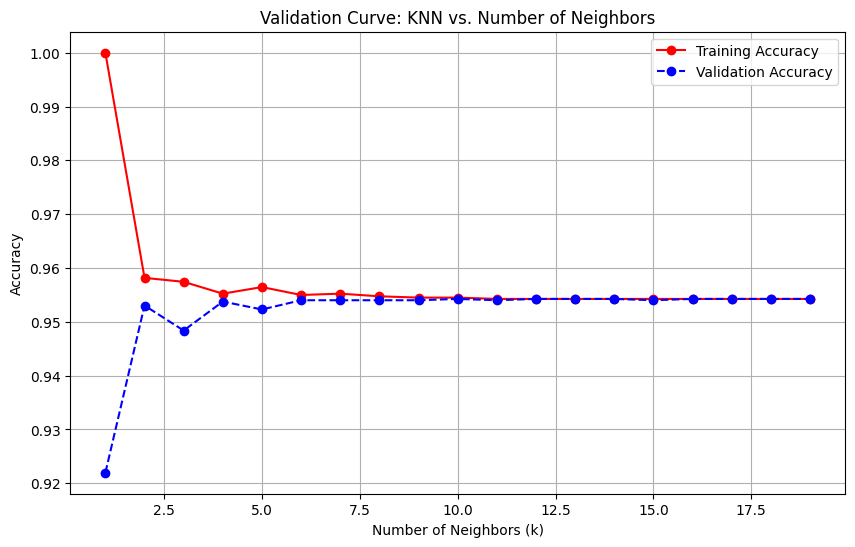

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the kNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_data_1_train, y_data_1_train)

# Make predictions
y_pred_knn = knn.predict(X_data_1_test)

# Evaluate the model
print("kNN Accuracy:", accuracy_score(y_data_1_test, y_pred_knn))
print(classification_report(y_data_1_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_data_1_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for kNN Model')
plt.show()

# Step 1: Define the range of k values to evaluate
k_range = range(1, 20)  # k values from 1 to 20

# Step 2: Calculate training and validation accuracies for different values of k
train_scores = []
validation_scores = []

for k in k_range:
    # Initialize kNN model with the current value of n_neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate training scores
    knn.fit(X_data_1_train, y_data_1_train)
    train_scores.append(knn.score(X_data_1_train, y_data_1_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(knn, X_data_1_train, y_data_1_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(k_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: KNN vs. Number of Neighbors')
plt.legend(loc='best')
plt.grid()
plt.show()


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load Dataset 1
data_1 = pd.read_csv('Dataset1.csv')

# Encoding categorical variables using pd.Categorical
data_1['gender'] = pd.Categorical(data_1['gender'], categories=['Female', 'Male']).codes
data_1['ever_married'] = pd.Categorical(data_1['ever_married'], categories=['No', 'Yes']).codes
data_1['Residence_type'] = pd.Categorical(data_1['Residence_type'], categories=['Rural', 'Urban']).codes
data_1['smoking_status'] = pd.Categorical(data_1['smoking_status'], categories=['never smoked', 'formerly smoked', 'smokes']).codes
data_1['work_type'] = pd.Categorical(data_1['work_type'], categories=['Never_worked', 'children', 'Govt_job', 'Self-employed', 'Private']).codes

# Fill missing values for numerical columns with the median
numerical_cols = data_1.select_dtypes(include=['int64', 'float64']).columns
data_1[numerical_cols] = data_1[numerical_cols].fillna(data_1[numerical_cols].median())

# Fill missing values for categorical columns with the mode (most frequent value)
categorical_cols = data_1.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    data_1[categorical_cols] = data_1[categorical_cols].fillna(data_1[categorical_cols].mode().iloc[0])

# Standardizing the Data
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data_1[numerical_columns] = scaler.fit_transform(data_1[numerical_columns])

# Defining Features and Target Variable
x_data_1 = data_1.drop(['id', 'stroke'], axis=1)
y_data_1 = data_1['stroke']

# Splitting the data into train and test sets
X_data_1_train, X_data_1_test, y_data_1_train, y_data_1_test = train_test_split(x_data_1, y_data_1, test_size=0.2, random_state=42)

# Step 5: Initialize SMOTE to balance the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_data_1_train_balanced, y_data_1_train_balanced = smote.fit_resample(X_data_1_train, y_data_1_train)
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid with additional metrics
param_grid_knn = {
    'n_neighbors': range(3, 21),  # Start from 3
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize stratified k-fold cross-validation
stratified_kf = StratifiedKFold(n_splits=5)  # Increase folds for better evaluation

# Initialize and perform GridSearchCV for kNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=stratified_kf, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model on the balanced training data
grid_search_knn.fit(X_data_1_train_balanced, y_data_1_train_balanced)

# Get the best parameters and evaluate on the test set
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_data_1_test)

# Evaluate the fine-tuned kNN model
accuracy_best_knn = accuracy_score(y_data_1_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_data_1_test, y_pred_best_knn)
best_params_knn = grid_search_knn.best_params_

# Display the best parameters and model performance
print("Best parameters for kNN:", best_params_knn)
print("Accuracy of the best kNN model:", accuracy_best_knn)
print("Classification report:\n", classification_rep_best_knn)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for kNN: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy of the best kNN model: 0.8052837573385518
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       960
           1       0.11      0.31      0.16        62

    accuracy                           0.81      1022
   macro avg       0.53      0.57      0.53      1022
weighted avg       0.90      0.81      0.85      1022



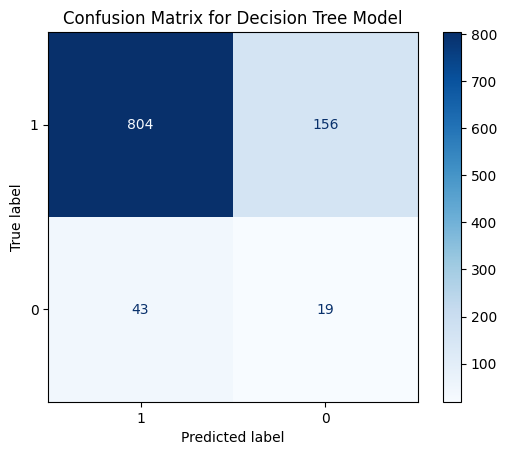

In [75]:
# Confusion metrics for dataset 1
conf_matrix_dt = confusion_matrix(y_data_1_test, y_pred_best_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

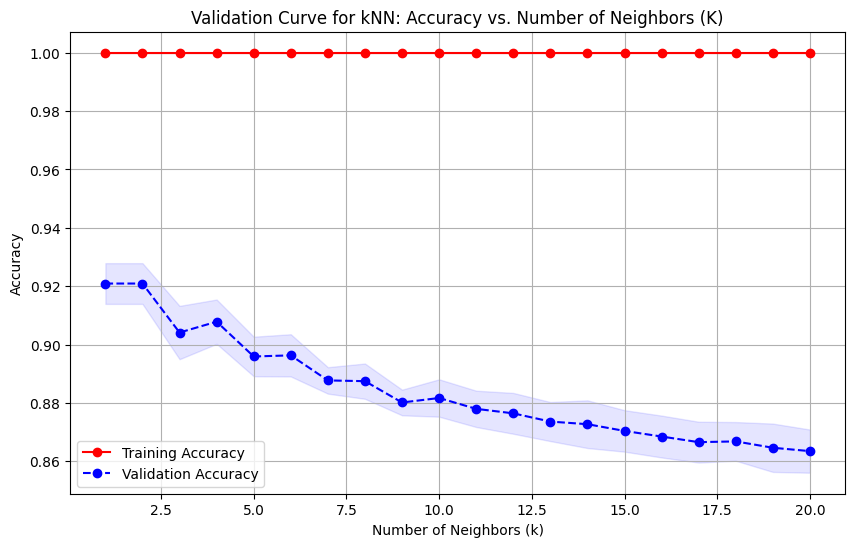

In [76]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Step 1: Define the range of k (number of neighbors) to evaluate
k_range = range(1, 21)

# Step 2: Calculate training and validation accuracies for different k values
train_scores, validation_scores = validation_curve(
    KNeighborsClassifier(weights='distance', metric='manhattan'),  # Using previously chosen parameters
    X_data_1_train_balanced,
    y_data_1_train_balanced,
    param_name='n_neighbors',
    param_range=k_range,
    scoring='accuracy',  # Using accuracy as the scoring metric
    cv=5  # 5-fold cross-validation
)

# Step 3: Calculate the mean and standard deviation for training and validation scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
validation_mean = validation_scores.mean(axis=1)
validation_std = validation_scores.std(axis=1)

# Step 4: Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_mean, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(k_range, validation_mean, marker='o', linestyle='--', color='b', label='Validation Accuracy')

# Step 5: Fill between for standard deviation
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, color='red', alpha=0.1)
plt.fill_between(k_range, validation_mean - validation_std, validation_mean + validation_std, color='blue', alpha=0.1)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for kNN: Accuracy vs. Number of Neighbors (K)')
plt.legend(loc='best')
plt.grid()
plt.show()

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')


# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany','InterviewScore',  'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis = 1)
y_data_2 = data_2['HiringDecision']

print(data_2.info())

#splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   float64
 7   SkillScore           1500 non-null   float64
 8   PersonalityScore     1500 non-null   float64
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.0 KB
None


kNN Accuracy: 0.7266666666666667
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       215
           1       0.53      0.29      0.38        85

    accuracy                           0.73       300
   macro avg       0.65      0.60      0.60       300
weighted avg       0.70      0.73      0.70       300



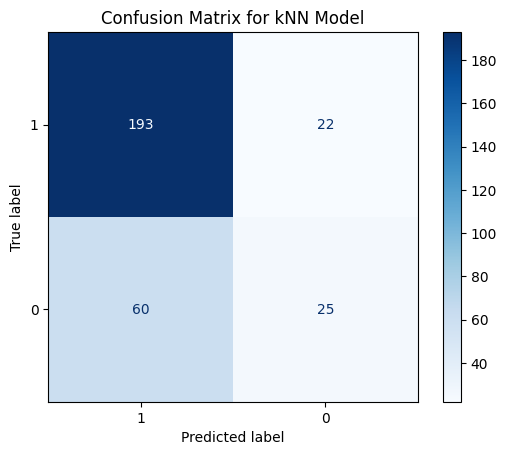

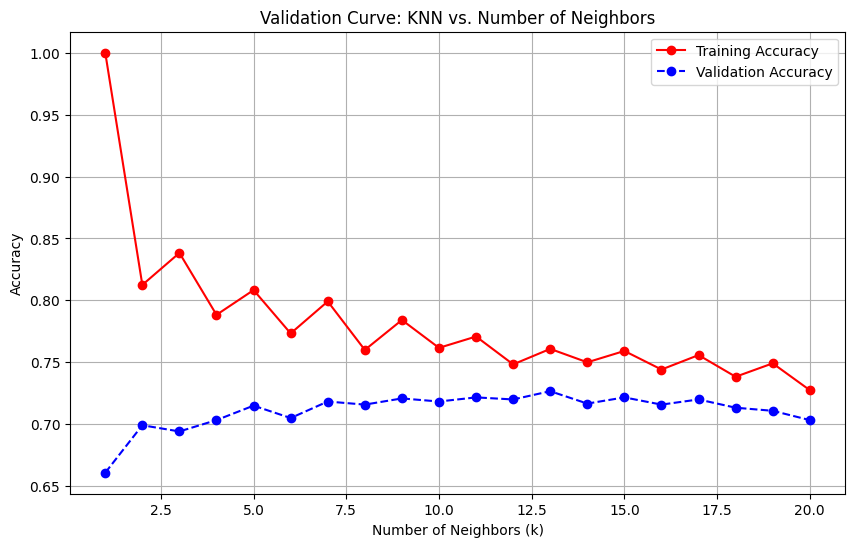

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the kNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_data_2_train, y_data_2_train)

# Make predictions
y_pred_knn2 = knn.predict(X_data_2_test)

# Evaluate the model
print("kNN Accuracy:", accuracy_score(y_data_2_test, y_pred_knn2))
print(classification_report(y_data_2_test, y_pred_knn2))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_data_2_test, y_pred_knn2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for kNN Model')
plt.show()

# Step 1: Define the range of k values to evaluate
k_range = range(1, 21)  # k values from 1 to 20

# Step 2: Calculate training and validation accuracies for different values of k
train_scores = []
validation_scores = []

for k in k_range:
    # Initialize kNN model with the current value of n_neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=k)

    # Calculate training scores
    knn.fit(X_data_2_train, y_data_2_train)
    train_scores.append(knn.score(X_data_2_train, y_data_2_train))

    # Calculate cross-validated validation scores using 5-fold cross-validation
    val_score = cross_val_score(knn, X_data_2_train, y_data_2_train, cv=5)
    validation_scores.append(val_score.mean())

# Step 3: Plotting the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(k_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Curve: KNN vs. Number of Neighbors')
plt.legend(loc='best')
plt.grid()
plt.show()


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset 2
data_2 = pd.read_csv('Dataset2.csv')

# Fill missing values for numerical columns with the median
numerical_cols = data_2.select_dtypes(include=['int64', 'float64']).columns
data_2[numerical_cols] = data_2[numerical_cols].fillna(data_2[numerical_cols].median())

# Standardizing the Data
numerical_columns = ['DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

scaler = StandardScaler()
data_2[numerical_columns] = scaler.fit_transform(data_2[numerical_columns])

# Defining Features and Target Variable
x_data_2 = data_2.drop(['HiringDecision'], axis=1)
y_data_2 = data_2['HiringDecision']

# Splitting the data into train and test sets
X_data_2_train, X_data_2_test, y_data_2_train, y_data_2_test = train_test_split(x_data_2, y_data_2, test_size=0.2, random_state=42)

# Step 5: Define parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15, 20],  # Different values for number of neighbors
    'weights': ['uniform', 'distance'],  # Weight functions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm options
}

# Step 6: Initialize and perform GridSearchCV for KNN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search_knn.fit(X_data_2_train, y_data_2_train)

# Get the best parameters and evaluate on the test set
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_data_2_test)

# Evaluate the fine-tuned KNN model
accuracy_best_knn = accuracy_score(y_data_2_test, y_pred_best_knn)
classification_rep_best_knn = classification_report(y_data_2_test, y_pred_best_knn)
best_params_knn = grid_search_knn.best_params_

# Display the best parameters and model performance
print("Best parameters for KNN:", best_params_knn)
print("Accuracy of the best KNN model:", accuracy_best_knn)
print("Classification report:\n", classification_rep_best_knn)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy of the best KNN model: 0.7533333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.94      0.85       215
           1       0.65      0.28      0.39        85

    accuracy                           0.75       300
   macro avg       0.71      0.61      0.62       300
weighted avg       0.73      0.75      0.72       300



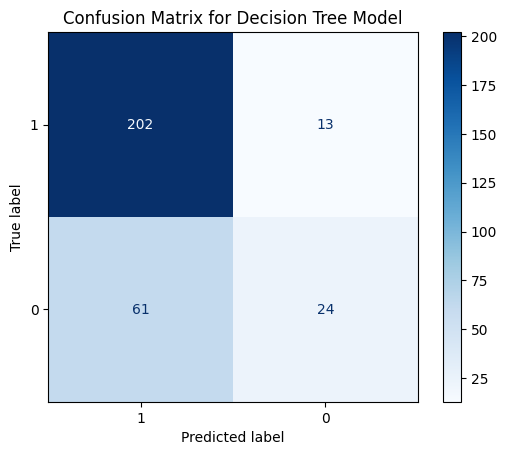

In [80]:
# Confusion metrics for dataset 2
conf_matrix_dt = confusion_matrix(y_data_2_test, y_pred_best_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['1', '0'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

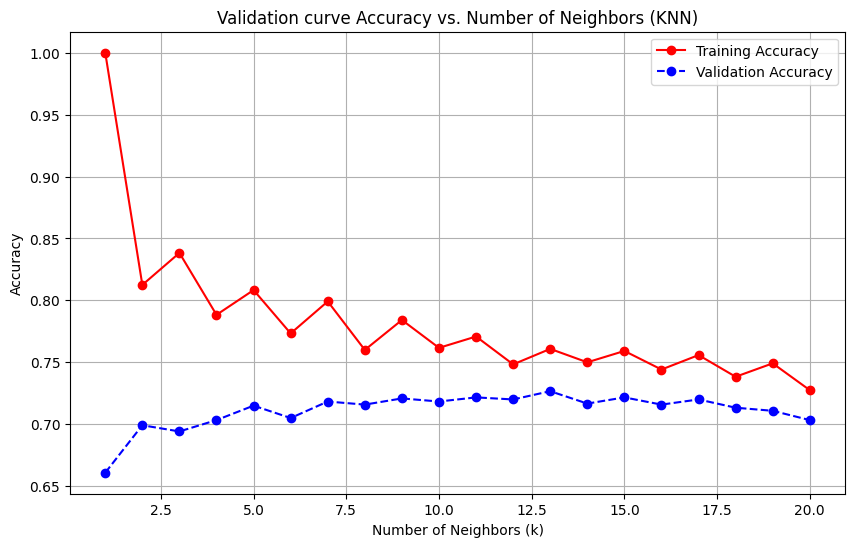

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Step 1: Extract the best parameters from GridSearchCV (if applicable)
# For KNN, you might want to consider 'n_neighbors' as the parameter to tune
best_params = grid_search_knn.best_params_  # Assuming you have already done GridSearchCV for KNN
best_n_neighbors = best_params['n_neighbors']

# Step 2: Define the range of neighbors to evaluate
neighbor_range = range(1, 21)

# Step 3: Initialize lists for storing training and validation accuracies
train_scores = []
validation_scores = []

# Step 4: Calculate training and validation accuracies for different n_neighbors values
for n_neighbors in neighbor_range:
    # Initialize KNN with the best n_neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model on the full training set
    knn.fit(X_data_2_train, y_data_2_train)

    # Calculate training accuracy
    train_acc = knn.score(X_data_2_train, y_data_2_train)
    train_scores.append(train_acc)

    # Perform cross-validation to get validation accuracy
    val_acc = cross_val_score(knn, X_data_2_train, y_data_2_train, cv=5, scoring='accuracy').mean()
    validation_scores.append(val_acc)

# Step 5: Plotting the accuracy vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, train_scores, marker='o', linestyle='-', color='r', label='Training Accuracy')
plt.plot(neighbor_range, validation_scores, marker='o', linestyle='--', color='b', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation curve Accuracy vs. Number of Neighbors (KNN)')
plt.legend(loc='best')
plt.grid()
plt.show()